In [1]:
from dataclasses import dataclass
from typing import List
import igraph as ig
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def show(graph):
    weights = None
    max_weight = 10
    print(graph.es.attribute_names())
    if "width" in graph.es.attribute_names():
        #print("HI")
        weights = graph.es["width"]
        weights = np.array(weights) / max(weights) * max_weight
        #print(weights)
        graph.es["width"] = weights.tolist()
    return ig.plot(graph, "graph.pdf",
            layout=graph.layout_fruchterman_reingold(weights=weights),
            # layout=graph.layout_circle(),
            bbox=(0,0,500,500),
            margin=50,
            vertex_frame_width=0,
            vertex_label_dist=1)

In [2]:
@dataclass
class WordOccurence:
    words: List[str]
    counts: List[int]
    total: int


In [53]:
file = "/Users/nb/Desktop/MA/14_analysis/COOC/lsb_combis_botev2_csv.csv"
file = "/Users/nb/Desktop/MA/14_analysis/COOC/lsb_combis_magv2_csv.csv"
df = pd.read_csv(file, sep=";")
df

,Alp,Unnamed: 1,Alpen,Unnamed: 3,Berg,Unnamed: 5,Berge,Unnamed: 7,Blick,Unnamed: 9,...,Unnamed: 21,Wiesen,Unnamed: 23,Wolken,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,3.0,Weiden,4.0,Bergsonne,1.0,Bahn,1.0,Gondelbahn,1.0,Seedamm,...,Blick,1.0,Kuppe,1.0,foreveralone,NaN,NaN,NaN,NaN,NaN
1,1.0,foreveralone,2.0,Alpenpanorama,2.0,Weite,1.0,Skiregion,1.0,Küste,...,Bergstation,1.0,Staumauerstrasse,1.0,Sonne,NaN,NaN,NaN,NaN,NaN
2,1.0,Aufstieg,2.0,Weite,1.0,foreveralone,1.0,Höhe,1.0,Wanderweg,...,Auen,1.0,Tiere,1.0,Alphütte,NaN,NaN,NaN,NaN,NaN
3,1.0,Gewitter,1.0,foreveralone,1.0,Ausblick,1.0,foreveralone,1.0,Axenstrasse,...,Höhe,1.0,Wegen,1.0,Blick,NaN,NaN,NaN,NaN,NaN
4,1.0,Ort,1.0,Eisenbahn,1.0,Pass,1.0,Blick,1.0,Wand,...,Licht,1.0,foreveralone,1.0,Eisgebirge,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
word_occurences = {}
for ci in range(len(df.columns)//2):
    counts_c_name = df.columns[ci*2]
    words_c_name = df.columns[ci*2+1]
    if counts_c_name.startswith("Unnamed:"):
        continue
    counts = df[counts_c_name].dropna().tolist()
    words = df[words_c_name].dropna().tolist()
    
    assert len(counts) == len(words)
    counts = np.asarray(counts)
    total = counts.sum()
    counts /= total
    word_occurences[counts_c_name] = WordOccurence(words=words, counts=counts, total=total)
word_occurences
    

{'Alp': WordOccurence(words=['Weiden', 'foreveralone', 'Aufstieg', 'Gewitter', 'Ort', 'Föhn', 'Tiere', 'Silberengebiet', 'Wanderungen', 'Wolken'], counts=array([0.23076923, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
        0.15384615, 0.07692308, 0.07692308, 0.07692308, 0.07692308]), total=13.0),
 'Alpen': WordOccurence(words=['Bergsonne', 'Alpenpanorama', 'Weite', 'foreveralone', 'Eisenbahn', 'Ruhe', 'Gipfel', 'Berg', 'Blick', 'Ferne', 'Alpkäse', 'Licht'], counts=array([0.23529412, 0.11764706, 0.11764706, 0.05882353, 0.05882353,
        0.05882353, 0.05882353, 0.05882353, 0.05882353, 0.05882353,
        0.05882353, 0.05882353]), total=17.0),
 'Berg': WordOccurence(words=['Bahn', 'Weite', 'foreveralone', 'Ausblick', 'Pass', 'Tourismus', 'Gipfel', 'Hotel', 'Quelle', 'Alpen', 'Blick', 'Ferne'], counts=array([0.07692308, 0.15384615, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308]), total=13.0),
 

75.02014212622609 Alp Blick [0.013329753472306641, 0.013329753472306641]
330.3295395147279 Alp See [0.003027279974624899, 0.003027279974624899]
4911.752263912306 Alp Sonne [0.0002035933300926461]
856.0101974658868 Alp Wiesen [0.0011682103822599045]
329.5261548974287 Alpen Berg [0.0024277283854722102, 0.0024277283854722102, 0.0024277283854722102, 0.0048554567709444205]
26.82284943195295 Alpen Berge [0.037281646848777425]
173.38098496945713 Alpen Blick [0.004325733875211981, 0.008651467750423962, 0.004325733875211981]
17.80727403651413 Alpen Gipfel [0.056156826583871416]
26.82284943195295 Alpen Kloster [0.037281646848777425, 0.037281646848777425]
91.53570032165092 Alpen See [0.010924699286574096]
51.940875730959895 Alpen Sonne [0.0012236723599220014, 0.037281646848777425]
26.184416717303908 Alpen Tal [0.06939759570002457, 0.0069837123731205115]
17.80727403651413 Alpen Wolken [0.056156826583871416]
49.000665743660164 Berg Berge [0.020407885991413955]
56.265106594669575 Berg Blick [0.01332

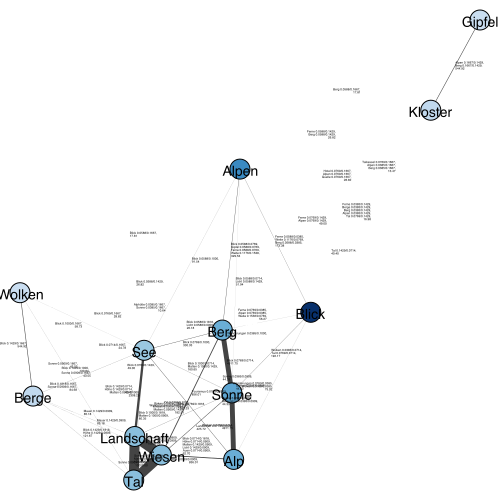

In [68]:
g2 = ig.Graph()
g2.clear()
g2.add_vertices(len(word_occurences))
g2.vs["label"] = list(word_occurences.keys())
totals = np.array([word_occurences[k].total for k in word_occurences])

cmap = plt.get_cmap("Blues")
g2.vs["color"] = [cmap(t/totals.max()) for t in totals]

for i in range(g2.vcount()):
    for j in range(i+1, g2.vcount()):
        w1 = g2.vs[i]["label"]
        w2 = g2.vs[j]["label"]
        common_words = set(word_occurences[w1].words).intersection(set(word_occurences[w2].words))
        
        if not common_words or (len(common_words) == 1 and "foreveralone" in common_words):
            continue
            
        label = ""
        weights = []
        for cw in common_words:
            if cw == "foreveralone":
                continue
            i1 = word_occurences[w1].words.index(cw)
            i2 = word_occurences[w2].words.index(cw)
            
            n1 = word_occurences[w1].counts[i1]
            n2 = word_occurences[w2].counts[i2]
            
            if min(n1,n2)>0.0:    
                #weights.append(n1*n2)
                #weights.append(n1*np.log(n2) + n2*np.log(n1)) # cross entropy
                weights.append(0.5*(n1*np.log(n1/n2)+n2*np.log(n2/n1)))
                #weights.append((n2*np.log(n2/n1)))
                #weights.append(max(n1,n2))
                #weights.append(min(n1,n2))
                
                label += f"{cw} {n1:.4f}/{n2:.4f},\n"
        if weights:
            weight = np.mean(weights)
            if weight > 0:
                weight = 1.0/weight
            else:
                weight = 10000
            print(weight, w1, w2, weights)
            g2.add_edge(i,j,label=label+f"{weight:.2f}", width=(weight))
g2.es["label_size"] = 3
show(g2)


In [56]:
g2.es["width"]

[0.07636800279750987,
 0.3362644548888689,
 10.0,
 1.7427796669534346,
 0.16772331807048158,
 0.054609532384249426,
 0.11766404034891599,
 0.03625442220966228,
 0.027304766192124713,
 0.1863605805084741,
 0.05287407928997214,
 0.026654862980047274,
 0.03625442220966228,
 0.0997620871550842,
 0.038184001398754934,
 0.019560623049912906,
 0.0498810435775421,
 0.6725289097777378,
 10.0,
 0.04512718496672147,
 1.7427796669534346,
 0.05868186914973872,
 0.1734203803801026,
 0.26637761447639535,
 0.041121232275582245,
 0.1238565322176918,
 0.1734203803801026,
 1.1094235683518643,
 0.009142604839978885,
 0.006915983748069864,
 0.09025436993344294,
 0.0692486025410298,
 0.19562106123804837,
 0.04512718496672147,
 0.09025436993344294,
 0.010829897221580478,
 0.5547117841759321,
 0.08224246455116449,
 4.69944896886549,
 0.1238565322176918,
 0.0,
 0.0,
 0.08867425225149794,
 0.16353165905013914,
 0.08179659477822415,
 0.1195672186087785,
 0.02552999256418822,
 0.8667303983084345,
 0.0504599401442

In [147]:
file = "/Users/nb/Desktop/MA/14_analysis/cossim.csv"
df = pd.read_csv(file, sep="\t")
df.head()
df
print(df.tail(1))

       Alp   Alpen  Aussicht    Bahn    Berg   Berge   Blick  Felsenkapelle  \
21  2.6827  4.6476      5.01  4.0259  2.9305  5.2485  5.1529         1.6985   

    Gipfel  Kloster  ...  Luftseilbahn     See     Ski  Skigebiet   Sonne  \
21  4.2128   3.6907  ...        2.1346  4.0831  1.6423     2.5428  2.5178   

       Tal  Talkessel  Wanderung  Wiesen  Wolken  
21  3.3357      4.535     3.4329   2.007  2.1656  

[1 rows x 21 columns]


In [148]:
word_list = list(df.columns)
sums = df.tail(1)
print(sums)
print("sum max: ", sums.max())

df = df.head(df.shape[0]-1)

for t in sums.values.tolist():
    print(t)
    print(type(t))
    print()
    
    
    

       Alp   Alpen  Aussicht    Bahn    Berg   Berge   Blick  Felsenkapelle  \
21  2.6827  4.6476      5.01  4.0259  2.9305  5.2485  5.1529         1.6985   

    Gipfel  Kloster  ...  Luftseilbahn     See     Ski  Skigebiet   Sonne  \
21  4.2128   3.6907  ...        2.1346  4.0831  1.6423     2.5428  2.5178   

       Tal  Talkessel  Wanderung  Wiesen  Wolken  
21  3.3357      4.535     3.4329   2.007  2.1656  

[1 rows x 21 columns]
sum max:  Alp              2.6827
Alpen            4.6476
Aussicht         5.0100
Bahn             4.0259
Berg             2.9305
Berge            5.2485
Blick            5.1529
Felsenkapelle    1.6985
Gipfel           4.2128
Kloster          3.6907
Landschaft       3.0691
Luftseilbahn     2.1346
See              4.0831
Ski              1.6423
Skigebiet        2.5428
Sonne            2.5178
Tal              3.3357
Talkessel        4.5350
Wanderung        3.4329
Wiesen           2.0070
Wolken           2.1656
dtype: float64
[2.6827, 4.6476, 5.01, 4.0259, 2

['label', 'width', 'color', 'label_size']


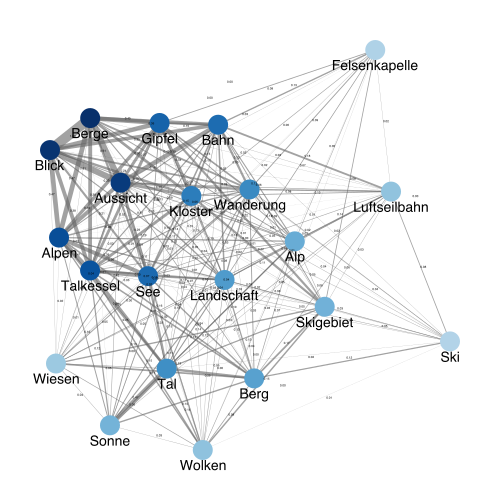

In [176]:
g2 = ig.Graph()
g2.clear()
g2.add_vertices(len(word_list))
g2.vs["label"] = word_list

cmap = plt.get_cmap("Blues")
g2.vs["color"] = [cmap(t/float(sums.max(axis=1))) for t in sums.values.tolist()[0]]

for i in range(g2.vcount()):
    for j in range(i+1, g2.vcount()):
        w1 = g2.vs[i]["label"]
        
        weight = df[w1][j]
        g2.add_edge(i,j,label=f"{weight:.2f}", width=(weight), color="rgba(100,100,100,0.6)")
g2.es["label_size"] = 3
show(g2)

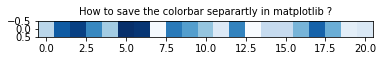

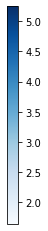

In [8]:
cmap = plt.get_cmap("Blues")
import matplotlib.pyplot as plt
import numpy as np

def f(x,y):
    return (x+y)*np.exp(-5.0*(x**2+y**2))

X,Y = np.mgrid[-1:1:100j, -1:1:100j]

Z = f(X,Y)

plt.figure()
mpb = plt.imshow([[2.6827, 4.6476, 5.01, 4.0259, 2.9305, 5.2485, 5.1529, 1.6985, 4.2128, 3.6907, 3.0691, 2.1346, 4.0831, 1.6423, 2.5428, 2.5178, 3.3357, 4.535, 3.4329, 2.007, 2.1656]],cmap='Blues')

plt.title('How to save the colorbar separartly in matplotlib ?',fontsize=10)
# plot the original without a colorbar
fig,ax = plt.subplots()
plt.colorbar(mpb,ax=ax)
ax.remove()
# save the same figure with some approximate autocropping
plt.savefig('plot_onlycbar_tight.pdf',bbox_inches='tight')